<a href="https://colab.research.google.com/github/Esbern/Python-for-Planners/blob/main/project_example/load%20analyse%20and%20display%20tif%20raster%20files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explanation:

  - Download the file: Since it’s hosted on GitHub, we fetch the raw file using requests.get().
  - Load with rasterio: The rasterio.open() function allows us to read geospatial raster images.
  - Reformat the image: rasterio loads data as (Bands, Height, Width), but matplotlib expects (Height, Width, Bands), so we transpose the array.
  - Normalize pixel values: If the image is 16-bit, divide by 65535; if it's 8-bit, divide by 255 for proper display.
  - Display the image using matplotlib.

In [2]:
!pip install rasterio # rasterio is not installed on colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.8 MB/s eta 0:00:00


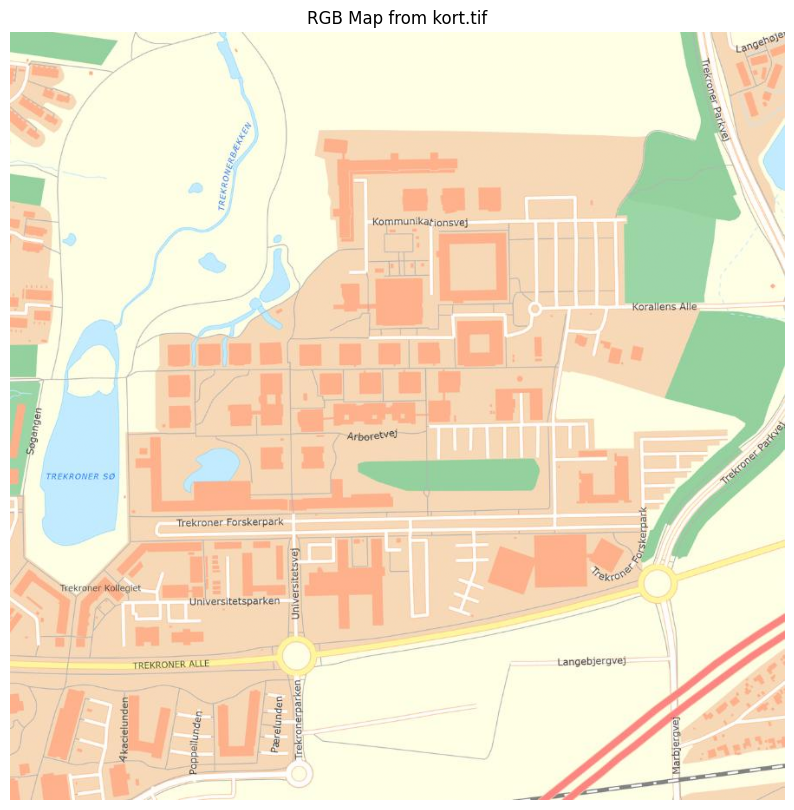

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# URL of the raw TIFF file on GitHub
url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/main/data/kort.tif"

# Download the file
response = requests.get(url)
tif_data = BytesIO(response.content)

# Open the TIFF file with rasterio
with rasterio.open(tif_data) as src:
    # Read all bands (assuming RGB)
    img = src.read()  # Shape: (Bands, Height, Width)

    # Convert to (Height, Width, Bands) for display
    img = np.moveaxis(img, 0, -1)

    # Normalize the pixel values (if needed)
    if img.dtype == np.uint16:  # If 16-bit image
        img = img / 65535.0
    elif img.dtype == np.uint8:  # If 8-bit image
        img = img / 255.0

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title("RGB Map from kort.tif")
    plt.show()


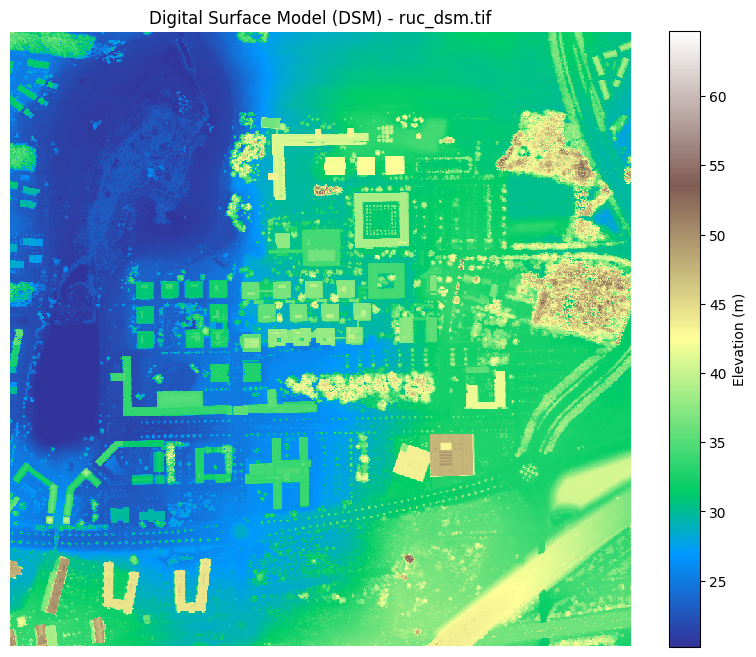

DSM Shape: (886, 894)
Sample values: [[36.933327 37.27649  37.104797 36.769432 34.94154 ]
 [34.17551  38.303276 36.976093 37.068638 36.297283]
 [36.547215 36.48035  37.63134  38.205524 37.163994]
 [36.54455  35.358944 36.59813  37.875797 37.06484 ]
 [36.342663 36.2809   36.82617  35.51138  36.99096 ]]


In [5]:
# URL of the DSM file (raw file link from GitHub)
dsm_url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/main/data/ruc_dsm.tif"

# Download the file
response = requests.get(dsm_url)
tif_data = BytesIO(response.content)

# Open the TIFF file with rasterio
with rasterio.open(tif_data) as src:
    dsm_array = src.read(1)  # Read the first (and likely only) band as a NumPy array
    profile = src.profile  # Store metadata (e.g., resolution, CRS)

# Plot the DSM as a grayscale image
plt.figure(figsize=(10, 8))
plt.imshow(dsm_array, cmap="terrain", interpolation="nearest")  # "terrain" colormap for elevation
plt.colorbar(label="Elevation (m)")
plt.title("Digital Surface Model (DSM) - ruc_dsm.tif")
plt.axis("off")
plt.show()

# Print array shape and sample values
print("DSM Shape:", dsm_array.shape)
print("Sample values:", dsm_array[0:5, 0:5])  # Print a small 5x5 section




What This Does

    Downloads the DSM from GitHub (requests.get()).
    Loads it into a NumPy array (rasterio.read(1)) → DSMs typically have one band.
    Displays the DSM as an image:
        Uses the "terrain" colormap for a topographic feel.
        Adds a colorbar to indicate elevation.
    Prints array properties for analysis:
        Shape of the array (Height x Width).
        Sample values from the DSM.

Using DSM as a NumPy Array for Calculations

Since the DSM is now a NumPy array, you can:

    Find the min/max elevation:



Min elevation: 20.212818
Max elevation: 64.70364


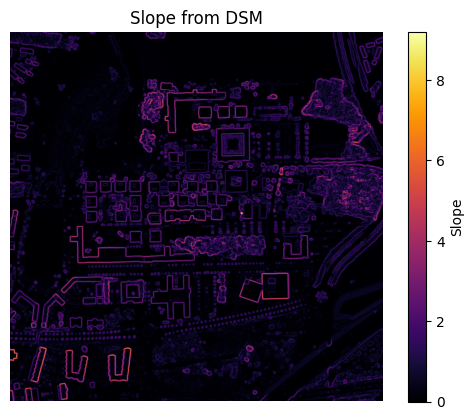

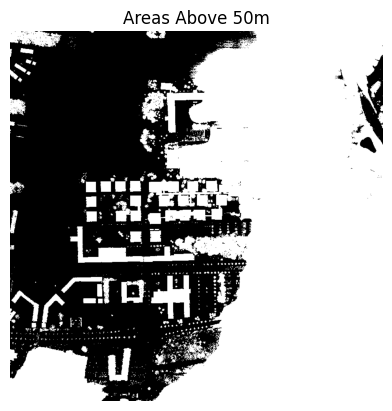

In [8]:
print("Min elevation:", np.min(dsm_array))
print("Max elevation:", np.max(dsm_array))

#Calculate slope (approximation):

from scipy.ndimage import gaussian_gradient_magnitude

slope = gaussian_gradient_magnitude(dsm_array, sigma=1)  # Approximate slope calculation
plt.imshow(slope, cmap="inferno")
plt.colorbar(label="Slope")
plt.title("Slope from DSM")
plt.axis("off")
plt.show()

#Mask areas above a certain height (e.g., above 30m):

high_areas = dsm_array > 30
plt.imshow(high_areas, cmap="gray")
plt.title("Areas Above 30m")
plt.axis("off")
plt.show()